In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt

from simulation import gen_simulated_data
from PPCA import ProjectedPCA

#  > choice of generating functions :

In [2]:
# factor functions

def g1(x):
    return x

def g2(x):
     return np.power(x,2)

def g3(x):
    return np.power(x,3)

def g_sinc(x):
    return np.sinc(2*x)

def g_sin(x):
    return np.sin(3*x)

def g_cos(x):
    return np.cos(10*x)

def g_arctg(x):
    return np.arctan(3*x)

def g_exp(x):
    return np.exp(x)

### - matrix dimensions are (K x d) 
### - "Z" dimensions implies K and d variables in data simulation
### - it must be a rectangular list

In [3]:
# Z = [[g_sinc, g_cos],
#              [g_exp, g_arctg]]

# Z = [[g_exp]] 


Z = [[g1],
     [g2],
     [g3]]

X, Y, F, Lambda, Gamma, H1 = gen_simulated_data(p = 200, T = 10, functions = Z, error = 'none', identify = True)
# 'trad' only estimates F and Lambda !!!
ppca = ProjectedPCA('spl', K = 'default', J = 6).fit(X,Y,H1)

Gx_identify:
 [[ 5.55188767e+03  1.80862589e-12 -6.39247346e-13]
 [ 1.80862589e-12  8.68762080e+02  3.52377595e-15]
 [-6.39247346e-13  3.52377595e-15  9.20539951e+01]]
F_identify:
 [[ 1.00000000e+00  4.93563693e-17 -8.21247674e-17]
 [ 4.93563693e-17  1.00000000e+00  2.27323023e-16]
 [-8.21247674e-17  2.27323023e-16  1.00000000e+00]]


# K estimation

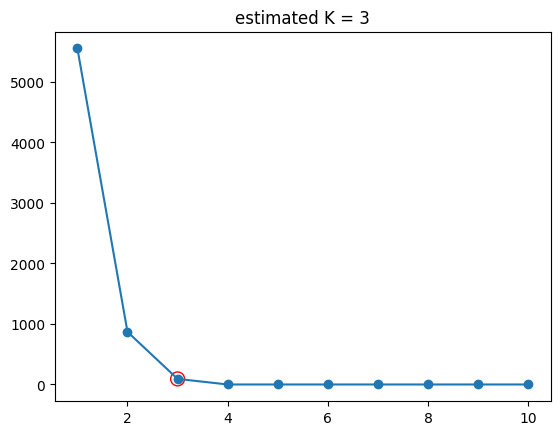

In [4]:
ppca.plot_K()

# Factor functions prediction

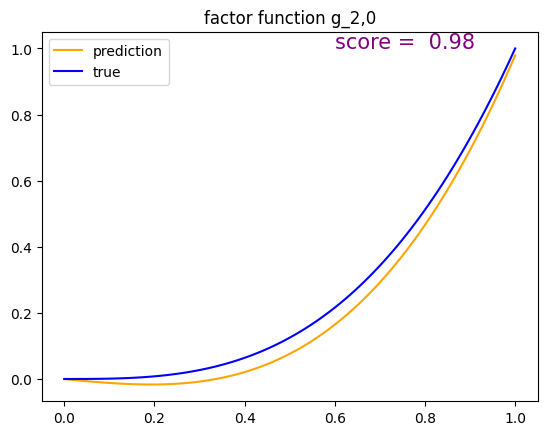

Estimated K: 3
F error: 1.075942497850596e-12
Lambda error: 4.0237211614025325e-12
Gamma error: 6.9024278183784356
Gx error: 6.902427818375628
Y error: 3.5378359541301445e-13
det(PHI.T @ PHI): 1.2195156901515047


In [8]:
k, l = 2, 0
ppca.plot_factor(k,l, f_compare = Z[k][l], score = True)

# DEBUG
p, T = ppca.Y.shape
print("Estimated K:", ppca.K_hat)
print("F error:", np.linalg.norm(F - ppca.F_hat)/np.sqrt(T))
print("Lambda error:", np.linalg.norm(Lambda - ppca.Lambda_hat)/np.sqrt(p))
print("Gamma error:", np.linalg.norm(Gamma - ppca.Gamma_hat @ H1.T)/np.sqrt(p))
print("Gx error:", np.linalg.norm((Lambda - Gamma) - ppca.Gx_hat)/np.sqrt(p))
print("Y error:", np.linalg.norm(Y-ppca.Y_hat))
print("det(PHI.T @ PHI):", np.linalg.det(ppca.PHI.T @ ppca.PHI))

# Revenues prediction

In [ ]:
ppca.plot_Y(0)

# HIGH DIMENSION LOW SAMPLE SIZE (test)

### it takes a lot of time to generate plots (~6h in my local machine)

In [ ]:
def plot_F_error(T, J, p_min = 10, p_max = 500, iterations = 500):
    interval_p = np.arange(p_min, p_max, 1)
    plt.title(f"F error (frobenius), T = {T}")

    F_error = np.empty(0)
    for p in interval_p:
        new_error = np.empty(iterations)
        for i in range(iterations):
            X, Y, F, _, _, H1 = gen_simulated_data(p, T, functions = Z)
            ppca = ProjectedPCA('trad', K = len(Z), J = J).fit(X,Y,H1)
            new_error[i] = np.linalg.norm(F - ppca.F_hat)/np.sqrt(T)
        F_error = np.append(F_error, new_error.mean())
        
    plt.plot(interval_p, F_error, label = 'PCA-trad')

    F_error = np.empty(0)
    for p in interval_p:
        new_error = np.empty(iterations)
        for i in range(iterations):
            X, Y, F, _, _, H1 = gen_simulated_data(p, T, functions = Z)
            ppca = ProjectedPCA('spl', K = len(Z), J = J).fit(X,Y,H1)
            new_error[i] = np.linalg.norm(F - ppca.F_hat)/np.sqrt(T)
        F_error = np.append(F_error, new_error.mean())

    plt.plot(interval_p, F_error, label = 'P-PCA')
    plt.legend()
    plt.show()

def plot_Lambda_error(T, J, p_min = 10, p_max = 500, iterations = 500): 
    interval_p = np.arange(p_min, p_max, 1)
    plt.title(f"Lambda error (frobenius), T = {T}")

    Lambda_error = np.empty(0)
    for p in interval_p:
        new_error = np.empty(iterations)
        for i in range(iterations):
            X, Y, _, Lambda, _, H1 = gen_simulated_data(p, T, functions = Z)
            ppca = ProjectedPCA('trad', K = len(Z), J = J).fit(X,Y,H1)
            new_error[i] = np.linalg.norm(Lambda - ppca.Lambda_hat)/np.sqrt(p)
        Lambda_error = np.append(Lambda_error, new_error.mean())
        
    plt.plot(interval_p, Lambda_error, label = 'PCA-trad')

    Lambda_error = np.empty(0)
    for p in interval_p:
        new_error = np.empty(iterations)
        for i in range(iterations):
            X, Y, _, Lambda, _, H1 = gen_simulated_data(p, T, functions = Z)
            ppca = ProjectedPCA('spl', K = len(Z), J = J).fit(X,Y,H1)
            new_error[i] = np.linalg.norm(Lambda - ppca.Lambda_hat)/np.sqrt(p)
        Lambda_error = np.append(Lambda_error, new_error.mean())

    plt.plot(interval_p, Lambda_error, label = 'P-PCA')
    plt.legend()
    plt.show()

In [ ]:
plot_F_error(T = 10, J = 6)

In [ ]:
plot_F_error(T = 50, J = 6)

In [ ]:
plot_Lambda_error(T = 10, J = 6)

In [ ]:
plot_Lambda_error(T = 50, J = 6)

# Linearity x Non-linearity (test)

In [9]:
# factor functions (adapted for testing)

def g1(c = 10):
    def inner(x):
        return c*x
    return inner  

def g2(c = 10):
     def inner(x):
         return (10-c)*np.power(x,2) - c*1
     return inner

def g3(c = 10):
    def inner(x):
        return (10-c)*np.power(x,3) - c*2*x
    return inner

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# testing linearity (c parameter)

def get_error(c, model, metric, n_iterations):
    Z = [[g1(c)],
         [g2(c)],
         [g3(c)]]
    X, Y, _, _, _, H1 = gen_simulated_data(p = 250, T = 10, functions = Z)
    error = 0
    for i in range(n_iterations):
        X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.25)
        if isinstance(model, ProjectedPCA): reg = model.fit(X_train, y_train, H1)
        else: reg = model().fit(X_train, y_train)
        y_pred = reg.predict(X_test)
        error += metric(y_test, y_pred)
    return error/n_iterations

def plot_linearity_coefficient(metric, n_iterations, metric_name):
    fs = np.linspace(0, 10, 100)
    errors_reg = np.asarray([get_error(f, LinearRegression, metric, n_iterations) for f in fs])
    errors_rfr = np.asarray([get_error(f, RandomForestRegressor, metric, n_iterations) for f in fs])
    errors_ppca = np.asarray([get_error(f, ProjectedPCA('spl', K = 3, J = 6), metric, n_iterations) for f in fs])

    
    a, b = np.polyfit(fs, errors_reg, 1)
    plt.plot(fs, a*fs+b, label = "Linear Regression")
    
    a, b = np.polyfit(fs, errors_rfr, 1)
    plt.plot(fs, a*fs+b, label = "Random Forest")
    
    a, b = np.polyfit(fs, errors_ppca, 1)
    plt.plot(fs, a*fs+b, label = "P-PCA")
    
    plt.title(f"best fit line for {metric_name}")
    plt.xlabel("linearity coefficient")
    plt.ylabel(metric_name) 
    plt.legend()
    plt.show()

In [ ]:
plot_linearity_coefficient(mean_absolute_error, 50, 'MAE')

In [ ]:
plot_linearity_coefficient(mean_squared_error, 50, 'MSE')